# Python image read and write tutorial using Pillow, OpenCV, and Sci-kit Image 

## Content 
* Establish full path to the image file. 
* Open and write an image file with Pillow.
* Open and write an image file with OpenCV.
* Open and write an image file with Sci-kit Image.

## Import necessary libraries
There are libraries to import. 
* `os` : For file- and directory-related business. 
* `matplotlib.pyplot` : The `plt.imshow` function will help us visualize the image. 
* `numpy` : We use `numpy` to support `matplotlib`.
* `PIL` : The Python Image Library. 

In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np
from PIL import Image 

# Use matplotlib in the `inline` mode. This is specific to Jupyter notebook, it is not valid in normal a Python file. 
%matplotlib inline  

## Establish full path

In [2]:
working_dir = os.getcwd()   # Get current working directory 
print('Current working directory: ' + working_dir)
image_read_write_dir = '/img-proc/read-write' # This notebook's location in the repository. 
if working_dir.endswith(image_read_write_dir): 
    # If already in the directory (with image), don't add anything else. 
    full_path = working_dir
else: 
    # If you run this Jupyter notebook from the root directory, we should add the directory where the sample image 
    #     can be found. 
    full_path = working_dir + image_read_write_dir

print('The current full path: ' + full_path)
img_file_name = 'pagoda.jpg'    # The sample image file name. 
img_file_path = os.path.join(full_path, img_file_name)
print('Image to open: ' + img_file_path)

# State the output image file name: 
pil_out_file_name = 'PIL_output-image.png'
cv_out_file_name = 'OpenCV_output-image.png'
sk_out_file_name = 'Scikit-image_output-image.png'

Current working directory: /Users/marchputt/PycharmProjects/Play-with-Python/img-proc/read-write
The current full path: /Users/marchputt/PycharmProjects/Play-with-Python/img-proc/read-write
Image to open: /Users/marchputt/PycharmProjects/Play-with-Python/img-proc/read-write/pagoda.jpg


As the output of the first cell. Now we have established the full path to the image. It is shown in **Image to open:** line. 

Next, we will **view** the image using _matplotlib_.

In [3]:
pil_img = Image.open(img_file_path)  # Load the image using Pillow
pil_img.show

<bound method Image.show of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x11625AFD0>>

Showing PIL image does not look so much like an image because it is a pointer information TO the location where the image is stored on the memory. To be able to see the image like human do, we need some visualization library like _matplotlib_. 

Unfortunately, the _matplotlib_ library cannot display the PIL image directly. We need to convert the PIL image (`pil_img`) into a numpy array (variable: `numpy_img`).

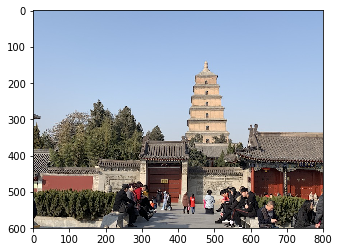

In [4]:
numpy_img = np.asarray(pil_img)     # Convert PIL typed image to numpy array. 
plt.imshow(numpy_img)   # Show numpy array with matplotlib's plt.imshow function.

Now we can **see** the image!

## Write the image using PIL command. 
This can be done using a simple line of code. We can use the Pillow method `save()`. 

In [5]:
print('Image to be saved as: ' + pil_out_file_name)
pil_img.save(pil_out_file_name)

Image to be saved as: PIL_output-image.png


## Read and write the image with OpenCV 

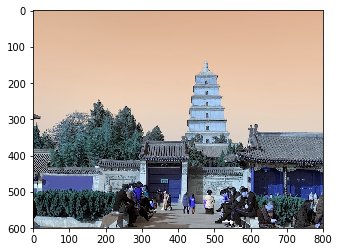

In [6]:
import cv2 as cv

cv_img = cv.imread(img_file_path)
plt.imshow(cv_img)    # Use matplotlib to show OpenCV typed image. 

You can see that the displayed image seems a bit weird. This happens because OpenCV image array organize the color mode as BGR, where the `matplotlib` understand everything as RGB. In this case, the **blue** and **red** color in the image has been swapped! 

No worries! We can fix this be rearranging the array. 

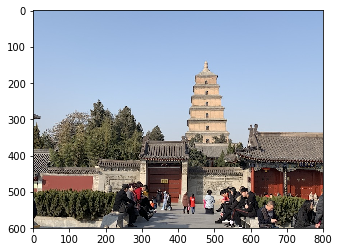

In [7]:
cv_rgb = cv.cvtColor(cv_img, cv.COLOR_BGR2RGB)
plt.imshow(cv_rgb)

Now that we can see the image correctly, let's write the image to a file. 

In [8]:
print('Image to be saved as: ' + cv_out_file_name)
cv.imwrite(cv_out_file_name, cv_img)

Image to be saved as: OpenCV_output-image.png


True

## Open and write an image file with Sci-kit Image.

Reading from: /Users/marchputt/PycharmProjects/Play-with-Python/img-proc/read-write/pagoda.jpg
Image to be saved as: Scikit-image_output-image.png


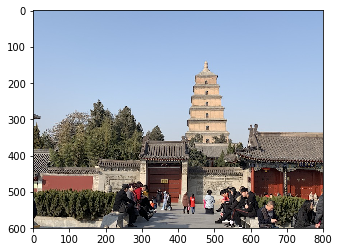

In [11]:
from skimage import io

print('Reading from: ' + img_file_path)
sk_img = io.imread(img_file_path)

# Show the image with matplotlib 
plt.imshow(sk_img)

# Save the image 
print('Image to be saved as: ' + sk_out_file_name)
io.imsave(sk_out_file_name, sk_img)

## Conclusion 
In this notebook, we have achieved the same goal with three different libraries including PIL (know as Pillow), OpenCV, and Scikit-Image. 

To view the image in the Jupyter notebook, we need help from `matplotlib` to visualize the image _inline_. In the other python script, you can use library-owned image visualization function to do the job as well. However, `matplotlib` does provide a good tool to get this specific task done. 

If you think you can improve this tutorial, please do so by submitting changes to the [repository](https://github.com/marchputt/Play-with-Python). 